# Practical no 7 :
# Aim: Forecasting using MA model.

In [2]:
# correct forecasts with a model of forecast residual errors
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from statsmodels.tsa.ar_model import AutoReg
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
from math import sqrt
# load data
series = read_csv('daily-total-female-births-CA.csv', header=0, index_col=0, parse_dates=True)
# create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']
print(dataframe)
X = dataframe.values

        t  t+1
0     NaN   35
1    35.0   32
2    32.0   30
3    30.0   31
4    31.0   44
..    ...  ...
360  34.0   37
361  37.0   52
362  52.0   48
363  48.0   55
364  55.0   50

[365 rows x 2 columns]


predicted=42.220487, expected=51.000000
predicted=45.518297, expected=41.000000
predicted=45.262804, expected=44.000000
predicted=43.916742, expected=38.000000
predicted=43.864170, expected=68.000000
predicted=47.328893, expected=40.000000
predicted=42.916993, expected=42.000000
predicted=44.815466, expected=51.000000
predicted=46.479522, expected=44.000000
predicted=40.853830, expected=45.000000
predicted=43.917768, expected=36.000000
predicted=43.976945, expected=57.000000
predicted=50.360951, expected=44.000000
predicted=45.080615, expected=42.000000
predicted=42.375970, expected=53.000000
predicted=47.467127, expected=42.000000
predicted=44.199714, expected=34.000000
predicted=41.445178, expected=40.000000
predicted=45.821461, expected=56.000000
predicted=47.881234, expected=44.000000
predicted=44.804177, expected=53.000000
predicted=44.046301, expected=55.000000
predicted=49.733419, expected=39.000000
predicted=43.490942, expected=59.000000
predicted=41.545297, expected=55.000000


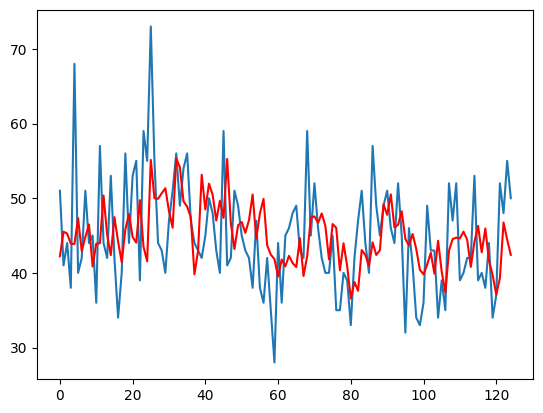

In [3]:
# split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
# persistence model on training set
train_pred = [x for x in train_X]
# calculate residuals
train_resid = [train_y[i]-train_pred[i] for i in range(len(train_pred))]
# model the training set residuals
model = AutoReg(train_resid,20)
model_fit = model.fit()
window = len(model_fit.ar_lags)
coef = model_fit.params
# walk forward over time steps in test
history = train_resid[len(train_resid)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test_y)):
  # persistence
  yhat = test_X[t]
  error = test_y[t] - yhat
  # predict error
  length = len(history)
  lag = [history[i] for i in range(length-window,length)]
  pred_error = coef[0]
  for d in range(window):
    pred_error += coef[d+1] * lag[window-d-1]
  # correct the prediction
  yhat = yhat + pred_error
  predictions.append(yhat)
  history.append(error)
  print('predicted=%f, expected=%f' % (yhat, test_y[t]))
# error
rmse = sqrt(mean_squared_error(test_y, predictions))
print('Test RMSE: %.3f' % rmse)
# plot predicted error
pyplot.plot(test_y)
pyplot.plot(predictions, color='red')
pyplot.show()
